In [66]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np

In [ ]:
X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.5, random_state=2
)
y

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)
# t = np.insert(X_train, 0, 1, axis=1)
# print(t)

[[  1.          -2.25997736  -8.21779094]
 [  1.           1.5880298   -1.7654783 ]
 [  1.          -0.52577983 -11.34940749]
 [  1.          -1.18679697  -1.80057881]
 [  1.          -0.59879906  -1.45632738]
 [  1.           1.90846569  -0.6583068 ]
 [  1.           2.67007966  -1.70491528]
 [  1.          -2.63347106 -10.36793378]
 [  1.           0.1638254   -0.84426193]
 [  1.          -1.7823564   -0.79782005]
 [  1.           0.73075429  -3.4492673 ]
 [  1.          -1.62247329 -12.58589376]
 [  1.          -3.4119278   -9.71171816]
 [  1.          -0.47151448 -10.37571491]
 [  1.          -2.87130051  -8.59397558]
 [  1.          -3.88704121  -7.92023943]
 [  1.           0.27327189  -2.8230258 ]
 [  1.          -0.04304745  -7.60915598]
 [  1.          -2.32798688 -10.87481325]
 [  1.          -0.83889419   1.41316281]
 [  1.          -0.45292089  -6.04316334]
 [  1.           2.69236867  -0.73809488]
 [  1.          -0.72443515  -7.44202457]
 [  1.          -2.56835447  -1.20

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

In [73]:

class Perceptron:
    def __init__(self, bias, adaption_rate=0.01, n_epochs=100):
        self.ar = adaption_rate
        self.n_epochs = n_epochs
        self.activation_func = lambda arr: np.where(arr > 0, 1, 0)
        self.weights = None
        self.bias = bias

    def fit(self, X, y):
        # prepend 1 to X
        X = np.insert(X, 0, 1, axis=1)
        # assign random weights
        self.weights = np.random.rand(X.shape[1])
        # adjust w0
        self.weights[0] = -self.bias
        for _ in range(self.n_epochs):
            for idx, x_i in enumerate(X):
                y_hat = self.activation_func(np.dot(x_i, self.weights))
                # adapt weights
                self.weights += self.ar * (y[idx] - y_hat) * x_i
                

    def predict(self, X):
        # prepend 1 to X
        X = np.insert(X, 0, 1, axis=1)
        return self.activation_func(np.dot(X, self.weights))
                

[1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0]
[1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0]
1.0


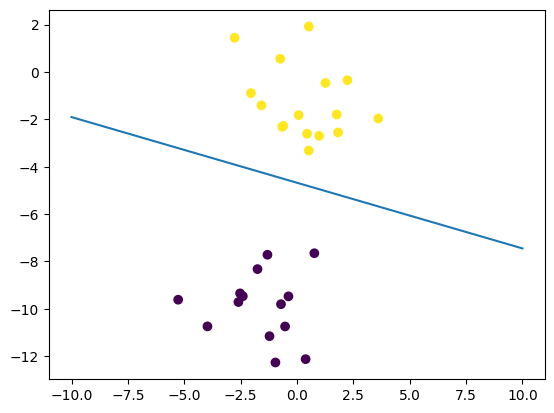

In [77]:
if __name__ == "__main__":
    p = Perceptron(bias=0.5)
    p.fit(X_train, y_train)
    y_pred = p.predict(X_test)
    print(y_pred)
    print(y_test)
    print(np.sum(y_pred == y_test) / len(y_test))
    # plot scatter plot and decision boundary
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_pred)
    x1 = np.linspace(-10, 10, 100)
    x2 = -(p.weights[0] + p.weights[1] * x1) / p.weights[2]
    plt.plot(x1, x2)
    plt.show()
    
    
